# Part 1: Regression analysis of Gapminder data

In [218]:
import pandas as pd
data = pd.read_csv("gap.tsv", sep='\t')
data.head()



,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


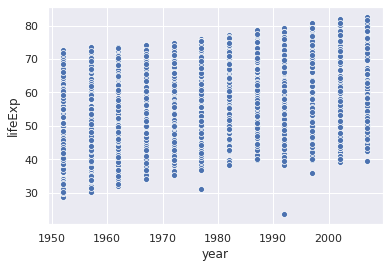

In [219]:
#Exercise 1
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

sns.scatterplot(x="year", y="lifeExp", data=data)

Question 1: Is there a general trend (e.g., increasing or decreasing) for life expectancy across time? Is this trend linear? (answering this qualitatively from the plot, you will do a statistical analysis of this question shortly)

From the scatter plot above, there does seem to be a general and slight increase of life expectancy across time, further, this increase does seem to be mostly linear (from a simple eye test).

In [220]:
#Exercise 2: Fit a linear regression model for life expectancy vs. year (as a continuous variable). 
from sklearn.linear_model import LinearRegression

x_train = data['year'].values.reshape(-1,1)
y_train = data['lifeExp'].values.reshape(-1,1)

#training the algorithm
regressor = LinearRegression()  
regressor.fit(x_train, y_train)

#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_[0])

[-585.65218744]
[0.32590383]


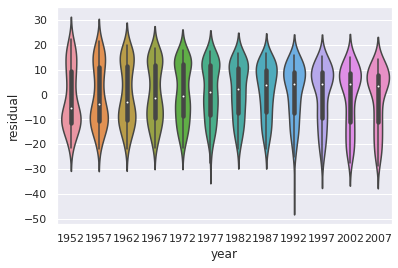

In [221]:
#Exercise 3: Make a violin plot of residuals vs. year for the linear model from Exercise 2

#predict lifeExp based on year
y_pred = regressor.predict(x_train)

#residual = lifeExp - lifeExp_pred
data['lifeExp_pred'] = pd.Series(y_pred.flatten(), index = data.index)
data['residual'] = data['lifeExp'] - data['lifeExp_pred']

sns.violinplot(x="year", y="residual", data=data)

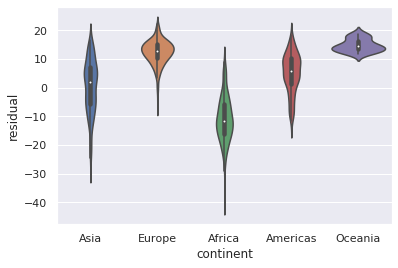

In [222]:
#Exercise 4: Make a boxplot (or violin plot) of model residuals vs. continent
sns.violinplot(x="continent", y="residual", data=data)

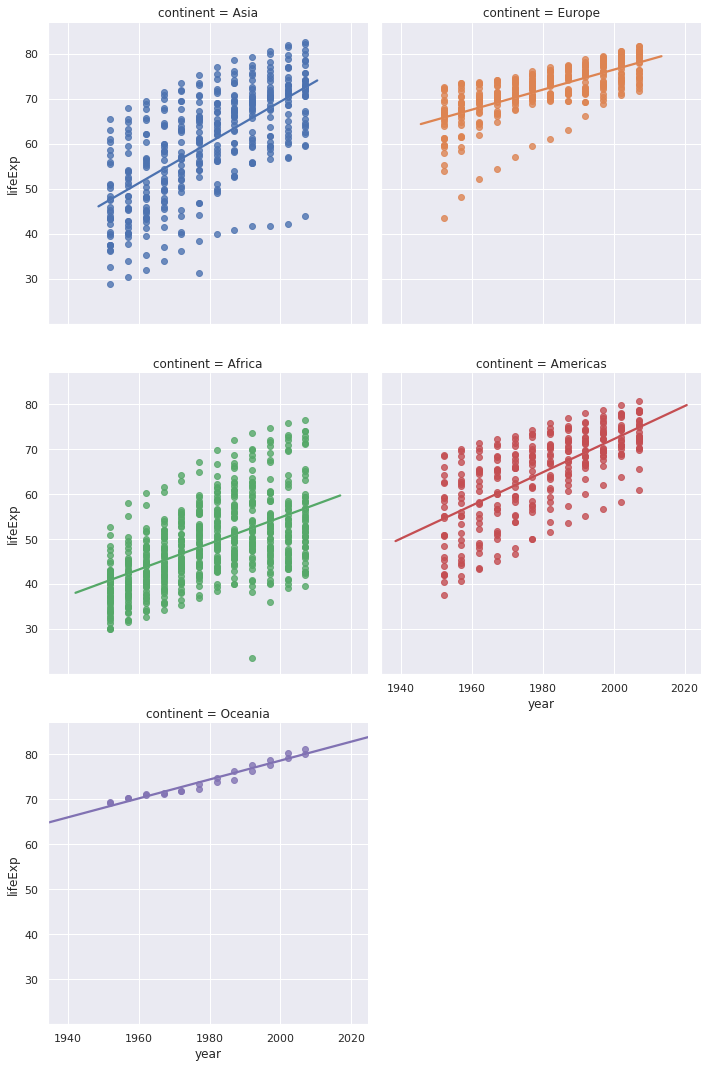

In [223]:
sns.lmplot(x="year", y="lifeExp", data=data, hue="continent", col="continent", 
           col_wrap=2, height=5, ci=0)

                            OLS Regression Results                            
Dep. Variable:                lifeExp   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     424.3
Date:                Thu, 21 Nov 2019   Prob (F-statistic):               0.00
Time:                        19:55:19   Log-Likelihood:                -5771.9
No. Observations:                1704   AIC:                         1.156e+04
Df Residuals:                    1694   BIC:                         1.162e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

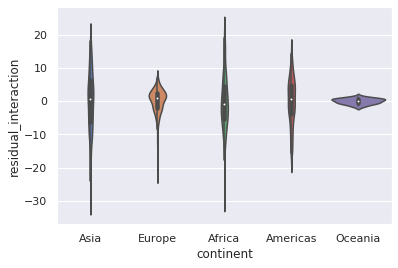

In [224]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

reg = ols(formula='lifeExp ~ year + continent + year*continent', data=data).fit()
print(reg.summary())

data['lifeExp_interaction_pred'] = reg.predict()
data['residual_interaction'] = data['lifeExp'] - data['lifeExp_interaction_pred']

sns.violinplot(x="continent", y="residual_interaction", data=data)

# Part 2: Classification

In [225]:
#Problem 1 Implement the gradient descent algorithm (either batch or stochastic versions) for 
#multiple linear regression.
import numpy as np

def gradientDescent(x, y, alpha, numIterations):
    xTrans = x.transpose()
    # m = number of weights, n = number of observations
    m = x.shape[0]
    n = x.shape[1]
    #intialize weights to 0
    theta = np.zeros(n)
    
    for i in range(0, numIterations):
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y 
        cost = np.sum(loss ** 2) / (2 * m)
        ##print("Iteration %d | Cost: %f" % (i, cost))
        # avg gradient per example
        gradient = np.dot(xTrans, loss) / m 
        # update
        theta = theta - alpha * gradient
    return theta

[ 3.73625026e-01 -1.76748172e-01  5.16705850e+01  6.13151429e+01
  4.74660911e+01 -5.60632871e-02 -2.94181742e-01  5.95924692e+01
  4.63983763e-02  1.11435530e-01  1.69918873e-01  1.11120866e-01
  2.06974329e-01  6.50088175e+01  1.01558081e+01 -1.05078016e-01
  7.68664221e+01  9.36054054e+01  4.87627157e+01  2.42116004e+01]
[ 4.12901943e-01 -2.09706000e-01  5.16589936e+01  6.13261959e+01
  4.74373346e+01 -6.18641506e-02 -3.17516770e-01  5.95736549e+01
  6.88292502e-02  1.38094483e-01  1.45709046e-01  1.05021204e-01
  2.23970251e-01  6.50196129e+01  1.01554799e+01 -9.48965187e-02
  7.68677482e+01  9.36154672e+01  4.88063382e+01  2.42220135e+01]


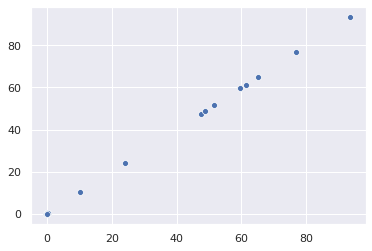

In [227]:
from sklearn import datasets

gen_data_x, gen_data_y = datasets.make_regression(n_samples=100, n_features=20, noise = 1.5)


linear_gd_coef = gradientDescent(gen_data_x, gen_data_y, 0.001, 100000)
print(linear_gd_coef)

sklearn_regressor.fit(gen_data_x, gen_data_y)
sklearn_coef = sklearn_regressor.coef_ 

#For retrieving the slope:
print(sklearn_coef)

sns.scatterplot(x=linear_gd_coef, y=sklearn_coef)